# **TUGAS PRAKTIKUM 1**


1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [ ]:
# Soal 1 - Model Klasifikasi kNN pada Dataset voice.csv
# Langkah 1 - Load Data

file_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/dataset/voice.csv'
df = pd.read_csv(file_path)

df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# Langkah 2 - Eksplorasi Data
df.info()

df.describe()

df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,count
label,
male,1584
female,1584


In [ ]:
# Langkah 3 - Preprocessing

# 3a. Pisahkan Fitur dan Label
# Fitur (X) adalah seluruh kolom kecuali 'label'
X = df.drop('label', axis=1)

# Label (y) adalah kolom 'label'
y = df['label']

# 3b. Encoding Label (male → 1, female → 0)
# Encode label
encode = {'male': 1, 'female': 0}
y = y.map(encode)

# 3c. Split Data + Standarisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Langkah 4 - Membuat Model kNN
from sklearn.neighbors import KNeighborsClassifier

# Inisiasi model dengan K = 5 (nanti bisa diubah untuk soal 3)
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Langkah 5 - Evaluasi Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi data test
y_pred = knn.predict(X_test)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9737118822292324
Confusion Matrix:
 [[435  17]
 [  8 491]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       452
           1       0.97      0.98      0.98       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [ ]:
# Soal 2 - Menentukan Fitur Terbaik dengan SelectKBest
# Langkah 1 - Load & Preprocessing
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label'].map({'male': 1, 'female': 0})

In [ ]:
# Langkah 2 - Seleksi Fitur dengan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# Inisiasi SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Mendapatkan skor tiap fitur
feature_scores = pd.DataFrame({
    'Fitur': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

feature_scores


,Fitur,Score
12,meanfun,7228.790362
5,IQR,1965.750000
3,Q25,1121.569224
8,sp.ent,1003.308717
1,sd,945.461376
9,sfm,463.923194
11,centroid,406.752820
0,meanfreq,406.752820
2,median,277.588158
17,maxdom,126.024161


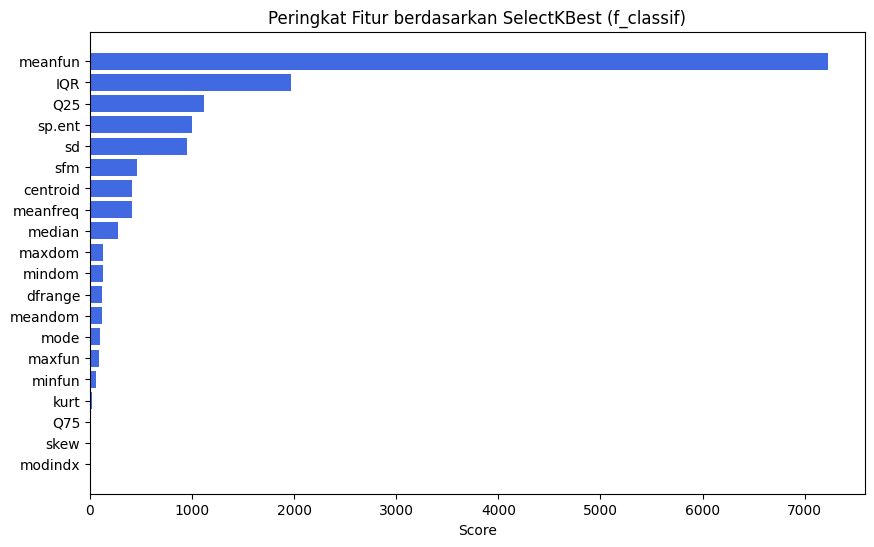

In [ ]:
# Langkah 3 - Visualisasi Ranking Fitur
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_scores['Fitur'], feature_scores['Score'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Peringkat Fitur berdasarkan SelectKBest (f_classif)')
plt.xlabel('Score')
plt.show()

In [ ]:
# Langkah 4 - Uji Akurasi kNN dengan Berbagai Jumlah Fitur
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Simpan fitur berdasar skor tertinggi
sorted_features = list(feature_scores['Fitur'])

results = {}

for k in [3, 5, 8, 10, 15, 20]:
    selected = sorted_features[:k]
    X_selected = X[selected]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Standardisasi
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model kNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Simpan akurasi
    results[k] = accuracy_score(y_test, y_pred)

results

{3: 0.9705573080967402,
 5: 0.9800210304942166,
 8: 0.9810725552050473,
 10: 0.9789695057833859,
 15: 0.9674027339642481,
 20: 0.9737118822292324}

In [ ]:
# Langkah 5 - Menentukan Fitur Terbaik
best_k = max(results, key=results.get)
best_accuracy = results[best_k]

print(f'Jumlah fitur optimal = {best_k}')
print(f'Akurasi terbaik     = {best_accuracy}')
print("\nFitur-fitur yang dipakai:")
print(sorted_features[:best_k])

Jumlah fitur optimal = 8
Akurasi terbaik     = 0.9810725552050473

Fitur-fitur yang dipakai:
['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq']


In [ ]:
# Soal 3 - Menggunakan 8 Fitur Terbaik
# Langkah 1 - Siapkan Data dengan 8 Fitur Terbaik
df = pd.read_csv(file_path)

# Encode Label
df['label'] = df['label'].map({'male': 1, 'female': 0})

# Fitur penting (hasil soal nomor 2)
best_features = ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq']

X = df[best_features]
y = df['label']


In [ ]:
# Langkah 2 - Split & Standardisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Langkah 3 - Cari Nilai K Terbaik
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

for k in range(1, 21):  # k = 1 sampai 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

accuracies


[0.9747634069400631,
 0.9747634069400631,
 0.9810725552050473,
 0.9800210304942166,
 0.9810725552050473,
 0.9831756046267087,
 0.9810725552050473,
 0.9842271293375394,
 0.982124079915878,
 0.9831756046267087,
 0.9800210304942166,
 0.9768664563617245,
 0.9747634069400631,
 0.9768664563617245,
 0.9747634069400631,
 0.9758149316508938,
 0.9747634069400631,
 0.9747634069400631,
 0.9747634069400631,
 0.9747634069400631]

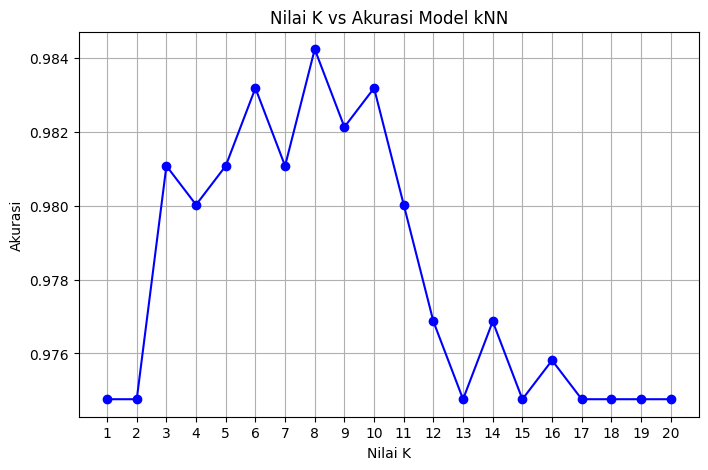

In [ ]:
# Langkah 4 - Grafik K vs Akurasi
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracies, marker='o', linestyle='-', color='blue')
plt.title('Nilai K vs Akurasi Model kNN')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(range(1,21))
plt.grid(True)
plt.show()

In [ ]:
# Langkah 5 - Menentukan K Terbaik
best_k = accuracies.index(max(accuracies)) + 1
best_acc = max(accuracies)

print(f"Nilai K terbaik = {best_k}")
print(f"Akurasi terbaik = {best_acc}")

Nilai K terbaik = 8
Akurasi terbaik = 0.9842271293375394
